In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Sparkathon/CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.shape


(7385, 12)

In [6]:
df['Engine Size(L)'].value_counts()

,count
Engine Size(L),
2.0,1460
3.0,804
3.6,536
3.5,529
2.5,423
2.4,346
1.6,302
5.3,290
1.8,216


In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation of 'CO2 Emissions(g/km)' with other columns
co2_correlation = correlation_matrix['CO2 Emissions(g/km)'].sort_values(ascending=False)

# Display the correlations
display(co2_correlation)

,CO2 Emissions(g/km)
CO2 Emissions(g/km),1.000000
Fuel Consumption City (L/100 km),0.919592
Fuel Consumption Comb (L/100 km),0.918052
Fuel Consumption Hwy (L/100 km),0.883536
Engine Size(L),0.851145
Cylinders,0.832644
Fuel Consumption Comb (mpg),-0.907426


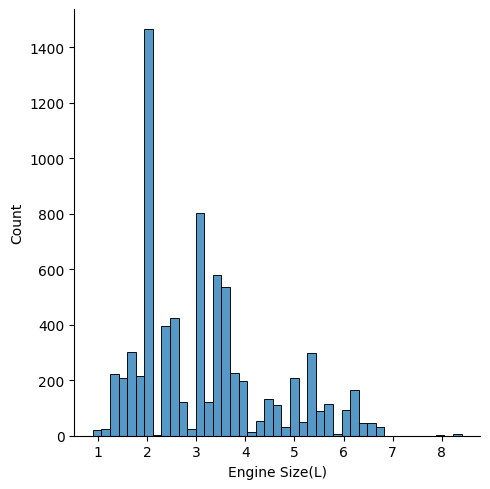

In [8]:

sns.displot(df['Engine Size(L)'])

In [9]:
df['Vehicle Class'].value_counts()

,count
Vehicle Class,
SUV - SMALL,1217
MID-SIZE,1133
COMPACT,1022
SUV - STANDARD,735
FULL-SIZE,639
SUBCOMPACT,606
PICKUP TRUCK - STANDARD,538
TWO-SEATER,460
MINICOMPACT,326


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [11]:
# Round engine size to nearest 0.5L
def round_to_nearest_half(x):
    return round(x * 2) / 2

# Apply binning
df["Engine Size (Binned)"] = df["Engine Size(L)"].apply(round_to_nearest_half)

# Preview the result
print(df[["Engine Size(L)", "Engine Size (Binned)"]].head())

   Engine Size(L)  Engine Size (Binned)
0             2.0                   2.0
1             2.4                   2.5
2             1.5                   1.5
3             3.5                   3.5
4             3.5                   3.5


In [12]:
print(df["Engine Size (Binned)"].value_counts().sort_index())

Engine Size (Binned)
1.0      46
1.5     731
2.0    1682
2.5     919
3.0     886
3.5    1314
4.0     326
4.5     293
5.0     287
5.5     502
6.0     262
6.5     121
7.0       8
8.0       3
8.5       5
Name: count, dtype: int64


In [13]:
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size (Binned)
5433,VOLKSWAGEN,PASSAT,MID-SIZE,2.0,4,AS6,X,9.3,6.5,8.1,35,188,2.0
4124,MINI,COOPER S CONVERTIBLE,MINICOMPACT,2.0,4,M6,Z,10.2,7.3,8.9,32,210,2.0
4623,CHEVROLET,TAHOE FFV,SUV - STANDARD,5.3,8,A6,E,19.8,13.9,17.2,16,285,5.5
7002,JEEP,Cherokee,SUV - SMALL,2.4,4,A9,X,10.8,7.6,9.3,30,219,2.5
6138,MAZDA,Mazda3 5-Door,MID-SIZE,2.0,4,AS6,X,8.6,6.7,7.7,37,181,2.0
6699,CHEVROLET,Malibu,MID-SIZE,1.5,4,AV,X,8.2,6.6,7.5,38,189,1.5
351,FORD,E350 WAGON FFV,VAN - PASSENGER,5.4,8,A4,E,26.7,20.5,23.9,12,382,5.5
2551,FIAT,500 ABARTH CABRIO,MINICOMPACT,1.4,4,A6,X,9.6,7.3,8.6,33,200,1.5
165,CADILLAC,CTS SEDAN,MID-SIZE,3.6,6,AS8,X,12.9,8.2,10.8,26,248,3.5
1562,GMC,YUKON XL DENALI 4WD,SUV - STANDARD,6.2,8,A8,Z,16.4,11.7,14.3,20,329,6.0


In [14]:
df.drop(columns=['Engine Size(L)'], inplace=True)

In [15]:
df.head()

,Make,Model,Vehicle Class,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size (Binned)
0,ACURA,ILX,COMPACT,4,AS5,Z,9.9,6.7,8.5,33,196,2.0
1,ACURA,ILX,COMPACT,4,M6,Z,11.2,7.7,9.6,29,221,2.5
2,ACURA,ILX HYBRID,COMPACT,4,AV7,Z,6.0,5.8,5.9,48,136,1.5
3,ACURA,MDX 4WD,SUV - SMALL,6,AS6,Z,12.7,9.1,11.1,25,255,3.5
4,ACURA,RDX AWD,SUV - SMALL,6,AS6,Z,12.1,8.7,10.6,27,244,3.5


In [16]:
relevant_classes = [
    "PICKUP TRUCK - SMALL",
    "PICKUP TRUCK - STANDARD",
    "SPECIAL PURPOSE VEHICLE",
    "STATION WAGON - SMALL",
    "STATION WAGON - MID-SIZE",
    "VAN - PASSENGER",
    "VAN - CARGO",
    "MINIVAN",
    "TWO-SEATER"  # Added only if it's practically used in last-mile delivery by the company
]

# Filter the dataset to keep only these vehicle classes
df = df[df["Vehicle Class"].isin(relevant_classes)]

# Confirm the column name remains 'Vehicle Class'
print("✅ Filtered dataset with only relevant 'Vehicle Class' entries.")

✅ Filtered dataset with only relevant 'Vehicle Class' entries.


In [17]:
df.sample(100)

,Make,Model,Vehicle Class,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size (Binned)
6710,CHEVROLET,Silverado WT 4WD,PICKUP TRUCK - STANDARD,4,A8,X,12.7,11.0,12.0,24,280,2.5
549,JAGUAR,F-TYPE V8 S CONVERTIBLE,TWO-SEATER,8,AS8,Z,15.0,10.2,12.8,22,294,5.0
5430,VOLKSWAGEN,GOLF SPORTWAGEN,STATION WAGON - SMALL,4,M5,X,9.4,6.9,8.2,34,192,2.0
6025,KIA,Niro,STATION WAGON - SMALL,4,AM6,X,4.6,5.1,4.8,59,114,1.5
3165,RAM,1500 HFE,PICKUP TRUCK - STANDARD,6,A8,X,12.9,9.3,11.3,25,264,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3756,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,8,A8,X,15.9,11.5,13.9,20,327,5.5
1444,FIAT,500L,STATION WAGON - SMALL,4,M6,X,9.3,7.1,8.3,34,191,1.5
5335,RAM,1500 4X4 FFV,PICKUP TRUCK - STANDARD,6,A8,X,14.5,10.2,12.6,22,294,3.5
5027,LAMBORGHINI,AVENTADOR S COUPE,TWO-SEATER,12,AM7,Z,23.8,14.1,19.4,15,454,6.5


In [18]:
df.shape

(1707, 12)

In [19]:
df.duplicated().sum()

np.int64(245)

In [20]:
df.describe()

,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size (Binned)
count,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,6.086702,13.972701,10.220211,12.285882,24.756883,275.756298,3.601347
std,1.908697,4.038369,2.669709,3.387993,6.983153,63.288508,1.461797
min,3.000000,4.500000,4.800000,4.700000,11.000000,110.000000,1.000000
25%,4.000000,11.100000,8.300000,9.800000,20.000000,230.000000,2.500000
50%,6.000000,13.400000,9.900000,11.800000,24.000000,274.000000,3.500000
75%,8.000000,16.000000,11.650000,14.100000,29.000000,313.000000,5.000000
max,16.000000,30.600000,20.600000,26.100000,60.000000,522.000000,8.500000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1707 entries, 12 to 7378
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              1707 non-null   object 
 1   Model                             1707 non-null   object 
 2   Vehicle Class                     1707 non-null   object 
 3   Cylinders                         1707 non-null   int64  
 4   Transmission                      1707 non-null   object 
 5   Fuel Type                         1707 non-null   object 
 6   Fuel Consumption City (L/100 km)  1707 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   1707 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  1707 non-null   float64
 9   Fuel Consumption Comb (mpg)       1707 non-null   int64  
 10  CO2 Emissions(g/km)               1707 non-null   int64  
 11  Engine Size (Binned)              1707 non-null   float64
dtypes: float64

/tmp/ipython-input-22-2433947696.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Engine Size (Binned)'])


<Axes: xlabel='Engine Size (Binned)', ylabel='Density'>

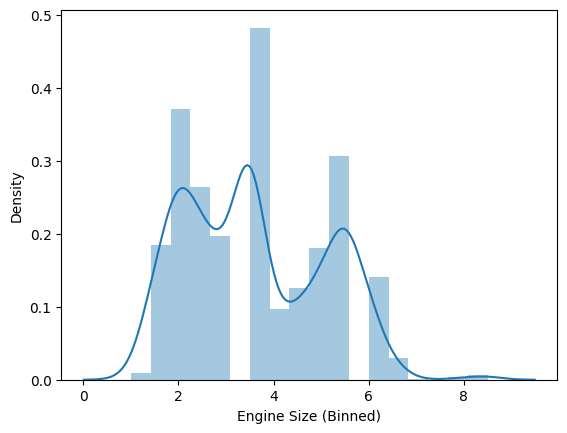

In [22]:
# prompt: code to generate distplot of engine size binned in a single line

sns.distplot(df['Engine Size (Binned)'])

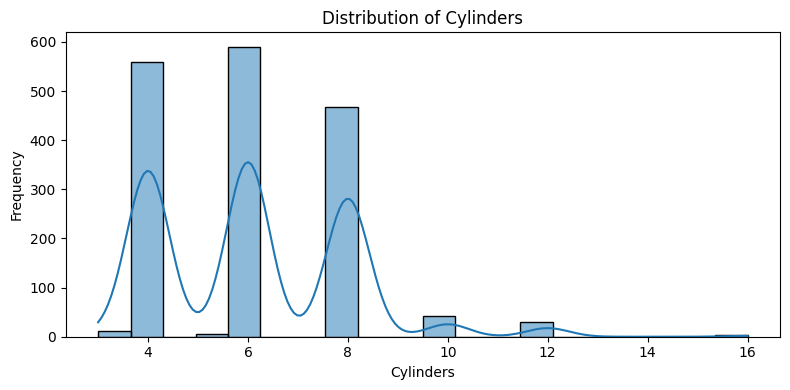

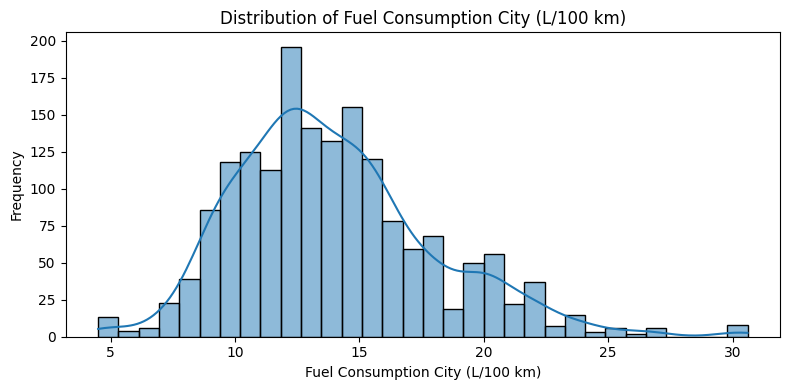

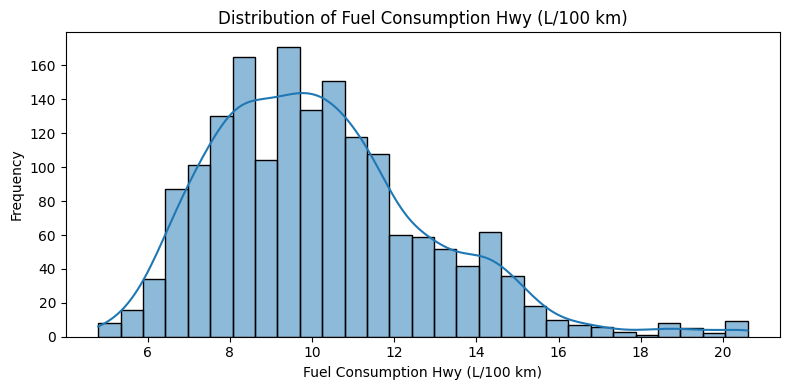

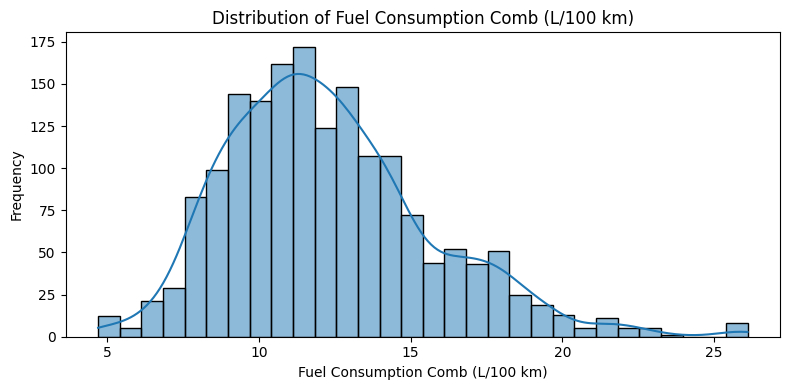

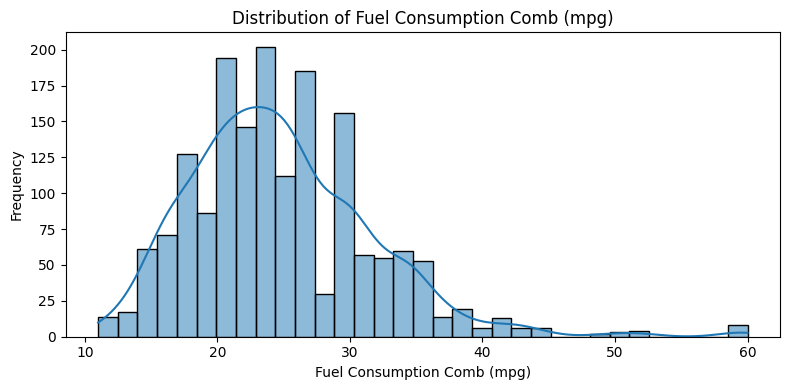

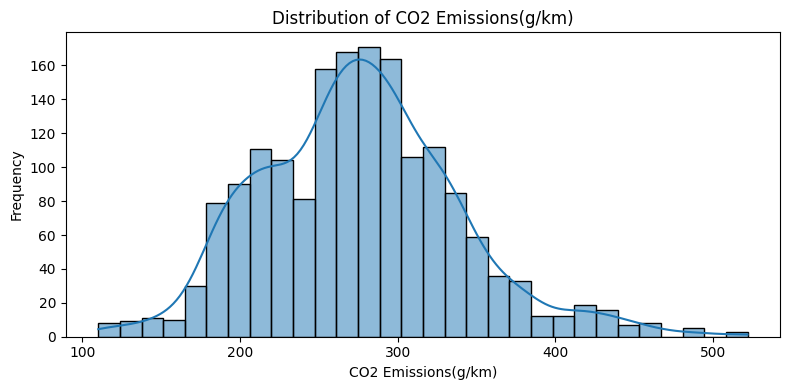

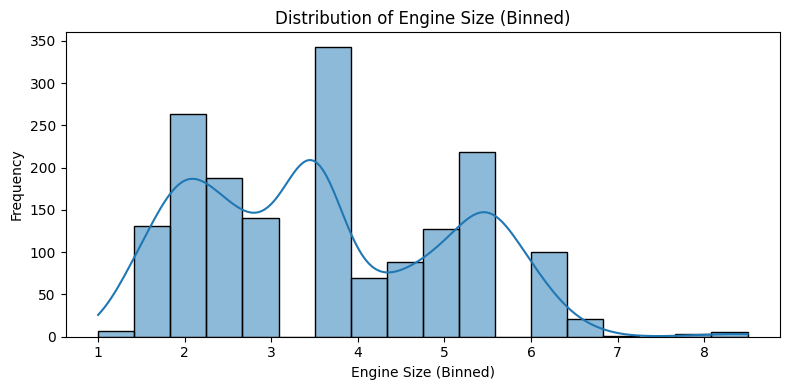

In [23]:
num_col = df.select_dtypes("number")

for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

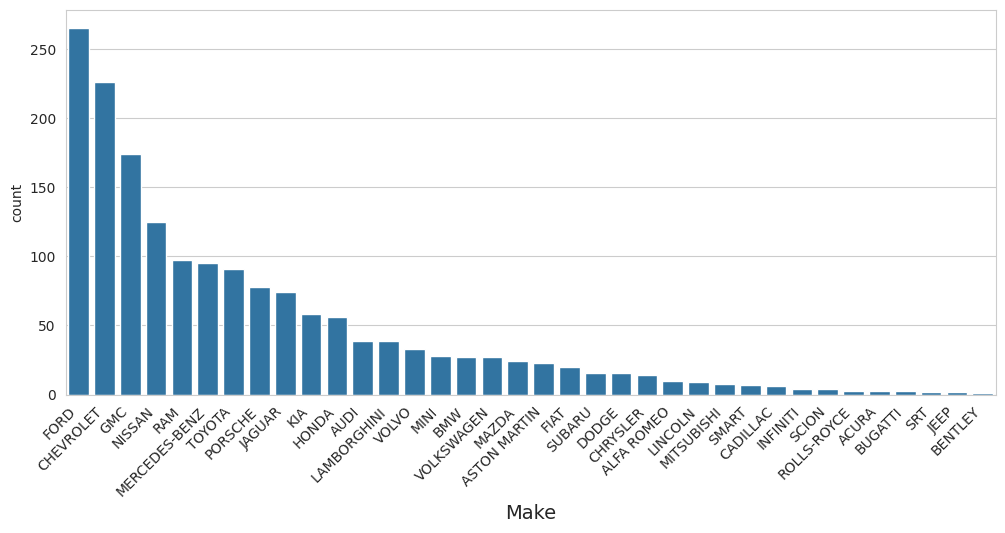

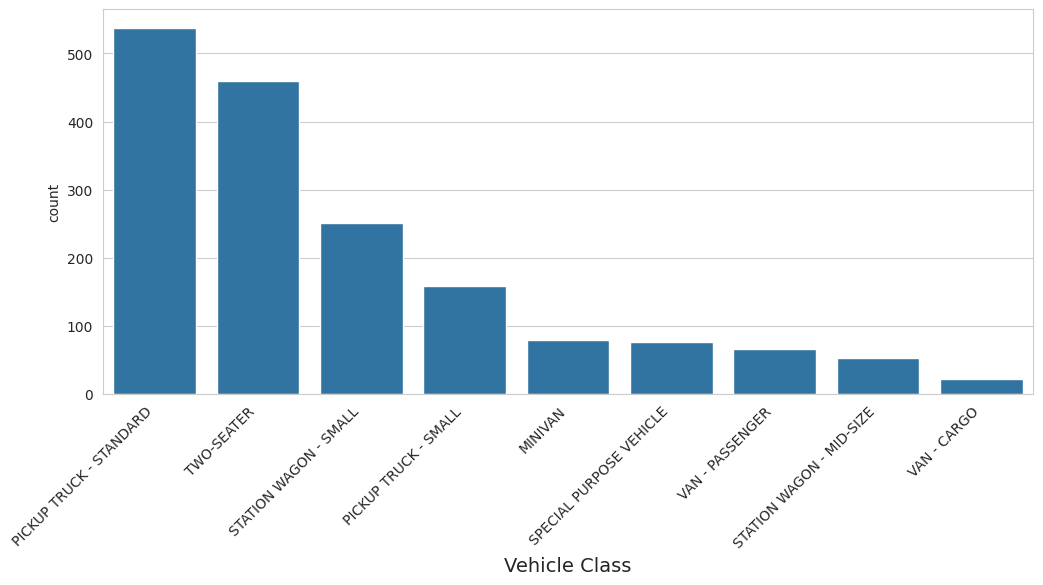

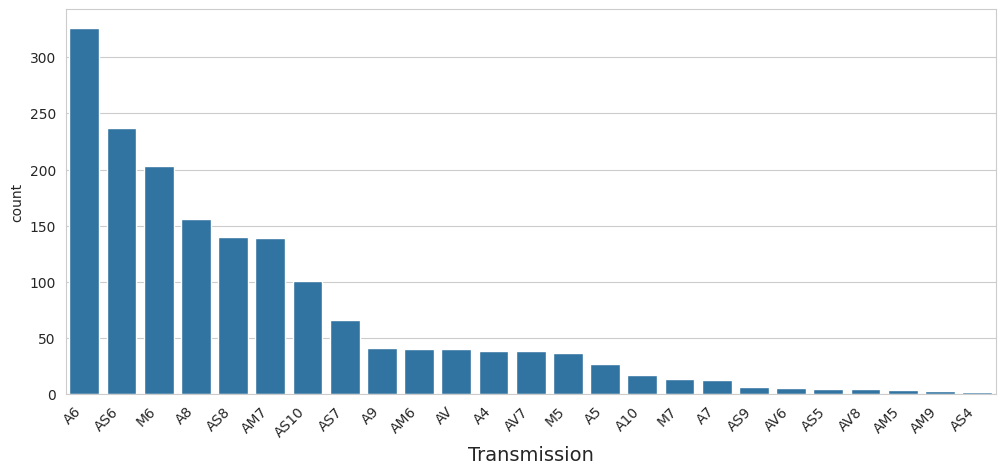

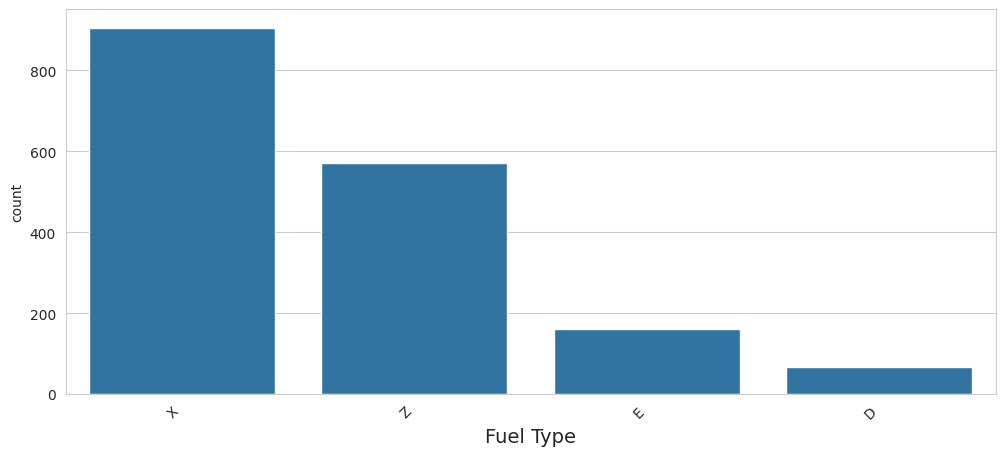

In [24]:
cat_col = df.drop("Model", axis=1).select_dtypes("object")
sns.set_style("whitegrid")
for col in cat_col:
    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col,order=df[col].value_counts().index)
    plt.xlabel(col,fontsize=14)
    plt.ylabel("count")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

<Axes: >

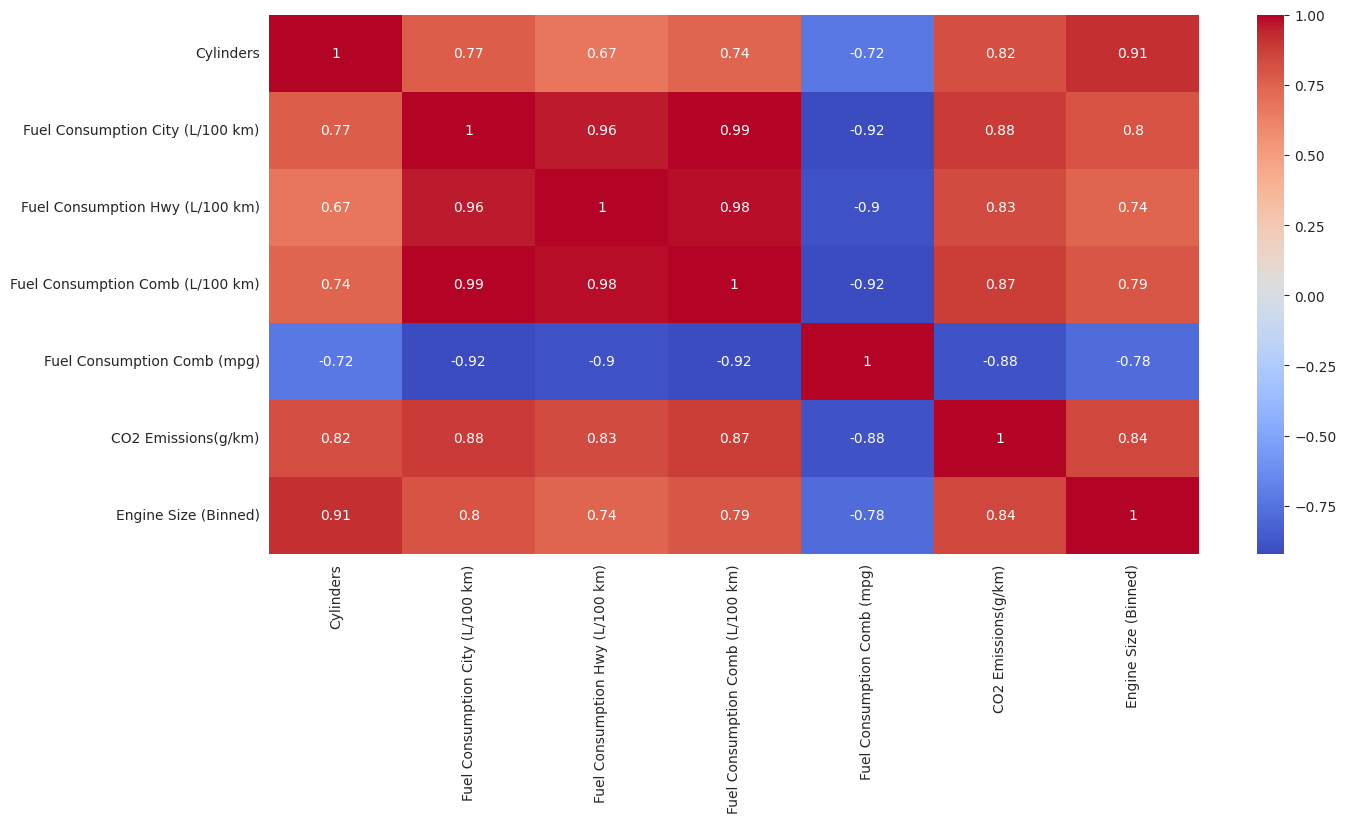

In [25]:
corr_df  = num_col.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_df,annot=True, cmap='coolwarm')

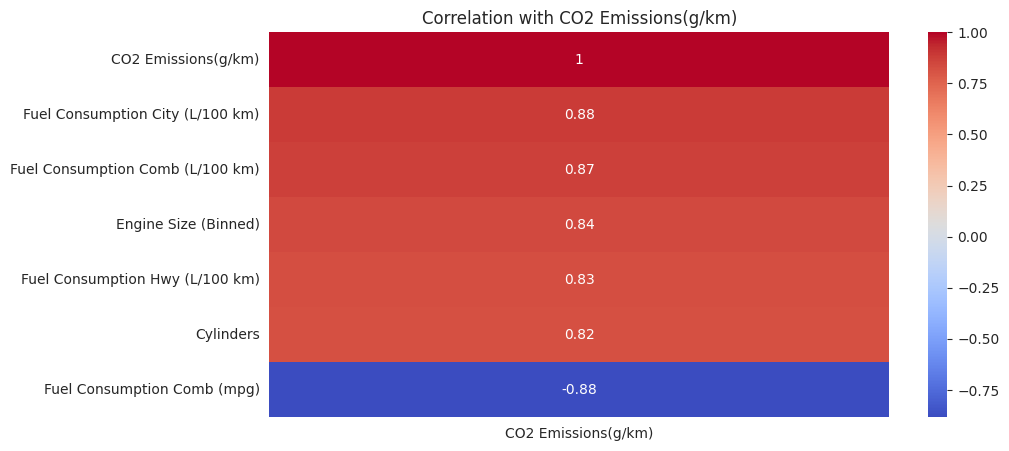

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_df[['CO2 Emissions(g/km)']].sort_values(by='CO2 Emissions(g/km)', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with CO2 Emissions(g/km)')
plt.show()

In [27]:
df.head()

,Make,Model,Vehicle Class,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size (Binned)
12,ALFA ROMEO,4C,TWO-SEATER,4,AM6,Z,9.7,6.9,8.4,34,193,2.0
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,8,AM7,Z,17.4,11.3,14.7,19,338,4.5
16,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,8,M6,Z,18.1,12.2,15.4,18,354,4.5
17,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,8,AM7,Z,17.4,11.3,14.7,19,338,4.5
18,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,8,M6,Z,18.1,12.2,15.4,18,354,4.5


In [28]:
df = df[df["Vehicle Class"] != "TWO-SEATER"]

In [29]:
df.head()

,Make,Model,Vehicle Class,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Engine Size (Binned)
38,AUDI,ALLROAD QUATTRO,STATION WAGON - SMALL,4,AS8,Z,11.8,8.8,10.5,27,242,2.0
80,BMW,328d xDRIVE TOURING,STATION WAGON - SMALL,4,A8,D,7.6,5.5,6.7,42,181,2.0
85,BMW,328i xDRIVE TOURING,STATION WAGON - SMALL,4,A8,Z,10.6,7.2,9.1,31,209,2.0
169,CADILLAC,CTS SPORT WAGON,STATION WAGON - SMALL,6,AS6,X,12.7,8.9,11.0,26,253,3.0
170,CADILLAC,CTS SPORT WAGON,STATION WAGON - SMALL,6,AS6,X,13.3,8.9,11.3,25,260,3.5


In [30]:
df.shape

(1247, 12)

In [31]:
# Drop columns that are not needed for static vehicle-based prediction
columns_to_drop = [
    "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)",
    "Transmission","Make",
    "Model"  # Optional: drop if you're generalizing across vehicle categories
]

# Drop the columns
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)



/tmp/ipython-input-31-198614503.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [32]:
df.head()

,Vehicle Class,Cylinders,Fuel Type,CO2 Emissions(g/km),Engine Size (Binned)
38,STATION WAGON - SMALL,4,Z,242,2.0
80,STATION WAGON - SMALL,4,D,181,2.0
85,STATION WAGON - SMALL,4,Z,209,2.0
169,STATION WAGON - SMALL,6,X,253,3.0
170,STATION WAGON - SMALL,6,X,260,3.5


In [33]:
#replace all the single-letter fuel type codes in your dataset with their full descriptive names
fuel_type_mapping = {
    'X': 'Regular Gasoline',
    'Z': 'Premium Gasoline',
    'D': 'Diesel',
    'E': 'Ethanol (E85)',
    'N': 'Natural Gas'
}

# Replace the codes with actual names
df['Fuel Type'] = df['Fuel Type'].replace(fuel_type_mapping)

print(df['Fuel Type'].unique())

['Premium Gasoline' 'Diesel' 'Regular Gasoline' 'Ethanol (E85)']


/tmp/ipython-input-33-3263714174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel Type'] = df['Fuel Type'].replace(fuel_type_mapping)


In [34]:
df.head()

,Vehicle Class,Cylinders,Fuel Type,CO2 Emissions(g/km),Engine Size (Binned)
38,STATION WAGON - SMALL,4,Premium Gasoline,242,2.0
80,STATION WAGON - SMALL,4,Diesel,181,2.0
85,STATION WAGON - SMALL,4,Premium Gasoline,209,2.0
169,STATION WAGON - SMALL,6,Regular Gasoline,253,3.0
170,STATION WAGON - SMALL,6,Regular Gasoline,260,3.5


In [35]:
# Model Training

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
#PREPROCESSING - FEATURE ENGINEERING

X = df.drop(columns=['CO2 Emissions(g/km)'])  # features
y = df['CO2 Emissions(g/km)']


In [37]:
#TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:

numeric_features = ['Engine Size (Binned)', 'Cylinders']
categorical_features = ['Fuel Type', 'Vehicle Class']

# One-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

#Linear Regression
linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

#Ridge regression
ridge_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])


#Random Forest
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])



In [39]:
linear_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size (Binned)',
                                                   'Cylinders']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel Type',
                                                   'Vehicle Class'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [40]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print("R² Score:", r2_score(y_test, predictions))
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))


In [41]:
print("Linear Regression:")
evaluate_model(linear_pipe, X_test, y_test)

print("\nRidge Regression:")
evaluate_model(ridge_pipe, X_test, y_test)

print("\nRandom Forest:")
evaluate_model(rf_pipe, X_test, y_test)

Linear Regression:
R² Score: 0.8734348444169898
MAE: 17.754827060644278
MSE: 495.38930525567434
RMSE: 22.257342726742433

Ridge Regression:
R² Score: 0.8730267677016768
MAE: 17.767861461141727
MSE: 496.98656035767067
RMSE: 22.293195382395737

Random Forest:
R² Score: 0.9066860537465663
MAE: 14.540549918286265
MSE: 365.2405813607614
RMSE: 19.111268439346492


In [42]:
#Engineering NEW feature for better accuracy

df['Engine_Cylinders'] = df['Engine Size (Binned)'] * df['Cylinders']


In [43]:
df.head()

,Vehicle Class,Cylinders,Fuel Type,CO2 Emissions(g/km),Engine Size (Binned),Engine_Cylinders
38,STATION WAGON - SMALL,4,Premium Gasoline,242,2.0,8.0
80,STATION WAGON - SMALL,4,Diesel,181,2.0,8.0
85,STATION WAGON - SMALL,4,Premium Gasoline,209,2.0,8.0
169,STATION WAGON - SMALL,6,Regular Gasoline,253,3.0,18.0
170,STATION WAGON - SMALL,6,Regular Gasoline,260,3.5,21.0


In [44]:
X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

In [45]:
numeric_features = [
    'Engine Size (Binned)',
    'Cylinders',
    'Engine_Cylinders'  # New engineered feature
]

categorical_features = ['Fuel Type', 'Vehicle Class']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n{name}:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression:
R² Score: 0.8720489183618165
MAE: 17.626736374384002
MSE: 500.813965324596
RMSE: 22.37887319157504

Ridge Regression:
R² Score: 0.8727233940175856
MAE: 17.659664353197666
MSE: 498.1739968041595
RMSE: 22.319811755571763

Random Forest:
R² Score: 0.9068195723624295
MAE: 14.531649254867359
MSE: 364.7179754820225
RMSE: 19.09759082926489


In [48]:
#XGBOOST
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("XGBoost:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

XGBoost:
R² Score: 0.9090328216552734
MAE: 14.26791763305664
MSE: 356.0550231933594
RMSE: 18.8694203194841


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [50]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(objective="reg:squarederror", random_state=42))
])

# Hyperparameter grid
param_grid = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [3, 5, 7],
    "regressor__learning_rate": [0.05, 0.1, 0.2],
    "regressor__subsample": [0.8, 1],
    "regressor__colsample_bytree": [0.8, 1]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, n_jobs=-1, scoring="r2", verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Parameters:", grid_search.best_params_)
print("\nXGBoost with GridSearch:")
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.2, 'regressor__max_depth': 7, 'regressor__n_estimators': 100, 'regressor__subsample': 1}

XGBoost with GridSearch:
R² Score: 0.908643901348114
MAE: 14.286511421203613
MSE: 357.5773620605469
RMSE: 18.909716075619613


In [51]:
df["EnginePowerRatio"] = df["Engine Size (Binned)"] / df["Cylinders"]

In [52]:
import joblib

joblib.dump(best_model, "xgboost_emission_model.pkl")
print("Model saved as 'xgboost_emission_model.pkl'")

Model saved as 'xgboost_emission_model.pkl'


In [53]:
numerical_features = ["Engine Size (Binned)", "Cylinders", "EnginePowerRatio"]
categorical_features = ["Fuel Type", "Vehicle Class"]

# Target variable
X = df[numerical_features + categorical_features]
y = df["CO2 Emissions(g/km)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [55]:
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(objective="reg:squarederror", random_state=42))
])

# Hyperparameters for tuning
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1],
    "model__colsample_bytree": [0.8, 1]
}

# GridSearchCV
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=3, n_jobs=-1, scoring="r2", verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Engine '
                                                                          'Size '
                                                                          '(Binned)',
                                                                          'Cylinders',
                                                                          'EnginePowerRatio']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Fuel '
                                                                          'Type',
                                                                          'Vehicle '
                                                                          'Class'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     cols...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1]},
             scoring='r2', verbose=1)

In [56]:
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best XGBoost with GridSearch:")
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Best XGBoost with GridSearch:
R² Score: 0.9090738892555237
MAE: 14.33159065246582
MSE: 355.8944396972656
RMSE: 18.86516471428929


In [57]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor

In [58]:
# STACKING

X = df.drop("CO2 Emissions(g/km)", axis=1)
y = df["CO2 Emissions(g/km)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select column types
categorical_features = X.select_dtypes(include="object").columns.tolist()
numerical_features = X.select_dtypes(exclude="object").columns.tolist()

# Preprocessor
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Base regressors
xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=18,
    min_samples_split=5,
    random_state=42
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.03,
    num_leaves=32,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

# Stacking Regressor
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf),
        ('lgbm', lgbm)
    ],
    final_estimator=XGBRegressor(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42
    ),
    passthrough=True,
    n_jobs=-1
)

# Final Pipeline
stacked_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', stacked_model)
])

# Train
stacked_pipeline.fit(X_train, y_train)

# Predict
y_pred = stacked_pipeline.predict(X_test)

# Evaluate
print("Stacking Regressor Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Stacking Regressor Performance:
R² Score: 0.9027009606361389
MAE: 14.463138580322266
MSE: 380.8387451171875
RMSE: 19.515090189829703


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [59]:
#CO2 Emissions might be right-skewed. Log-transforming the target

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the pipeline on log-transformed target
stacked_pipeline.fit(X_train, y_train_log)

# Predict and reverse the log
y_pred_log = stacked_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
print("Log-Transformed Stacking Regressor:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Log-Transformed Stacking Regressor:
R² Score: 0.9053143262863159
MAE: 14.368744850158691
MSE: 370.60968017578125
RMSE: 19.25122542010719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [60]:
#USING OPTUNA
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 23.1 MB/s eta 0:00:00


In [61]:
import optuna

In [62]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1
    }

    xgb_model = XGBRegressor(**params)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # your preprocessor from earlier
        ('regressor', xgb_model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return r2_score(y_test, y_pred)

In [63]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

[I 2025-07-05 16:49:36,307] A new study created in memory with name: no-name-0b026e93-ba15-490a-8943-eceb762486be


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-07-05 16:49:36,720] Trial 0 finished with value: 0.9086524248123169 and parameters: {'n_estimators': 799, 'max_depth': 3, 'learning_rate': 0.08825621757192778, 'subsample': 0.6917377732318575, 'colsample_bytree': 0.5198670789736526, 'gamma': 0.16614261796012497, 'reg_alpha': 4.973006420931935, 'reg_lambda': 1.0033429835094898}. Best is trial 0 with value: 0.9086524248123169.
[I 2025-07-05 16:49:37,562] Trial 1 finished with value: 0.9085166454315186 and parameters: {'n_estimators': 985, 'max_depth': 12, 'learning_rate': 0.1697729882753404, 'subsample': 0.9449030462178689, 'colsample_bytree': 0.7580082668551836, 'gamma': 4.555276921511381, 'reg_alpha': 2.8544331583005658, 'reg_lambda': 1.637074480555158}. Best is trial 0 with value: 0.9086524248123169.
[I 2025-07-05 16:49:38,154] Trial 2 finished with value: 0.9036266803741455 and parameters: {'n_estimators': 433, 'max_depth': 6, 'learning_rate': 0.010024428244081268, 'subsample': 0.8421221725641561, 'colsample_bytree': 0.792359

In [64]:
print("Best parameters:", study.best_params)
print("Best R² Score:", study.best_value)

Best parameters: {'n_estimators': 506, 'max_depth': 4, 'learning_rate': 0.20331270149642722, 'subsample': 0.8318926812667294, 'colsample_bytree': 0.8339084097620098, 'gamma': 4.1192046350226645, 'reg_alpha': 2.9567046763029143, 'reg_lambda': 2.5866765534803093}
Best R² Score: 0.9095967411994934


In [65]:
best_params = study.best_params
best_params.update({"random_state": 42, "n_jobs": -1})  # safety

final_model = XGBRegressor(**best_params)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', final_model)
])

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

print("Final XGBoost with Optuna:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Final XGBoost with Optuna:
R² Score: 0.9095967411994934
MAE: 14.17058277130127
MSE: 353.8477478027344
RMSE: 18.810841230597166


/tmp/ipython-input-66-2404692855.py:4: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


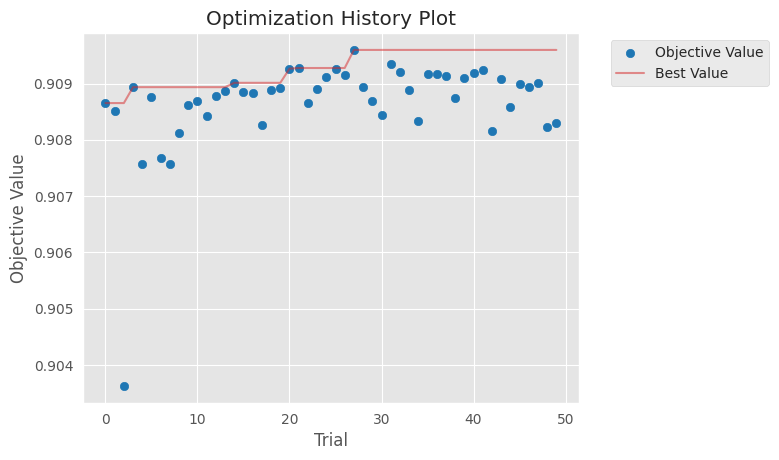

In [66]:
from optuna.visualization.matplotlib import plot_optimization_history
import matplotlib.pyplot as plt

plot_optimization_history(study)
plt.show()

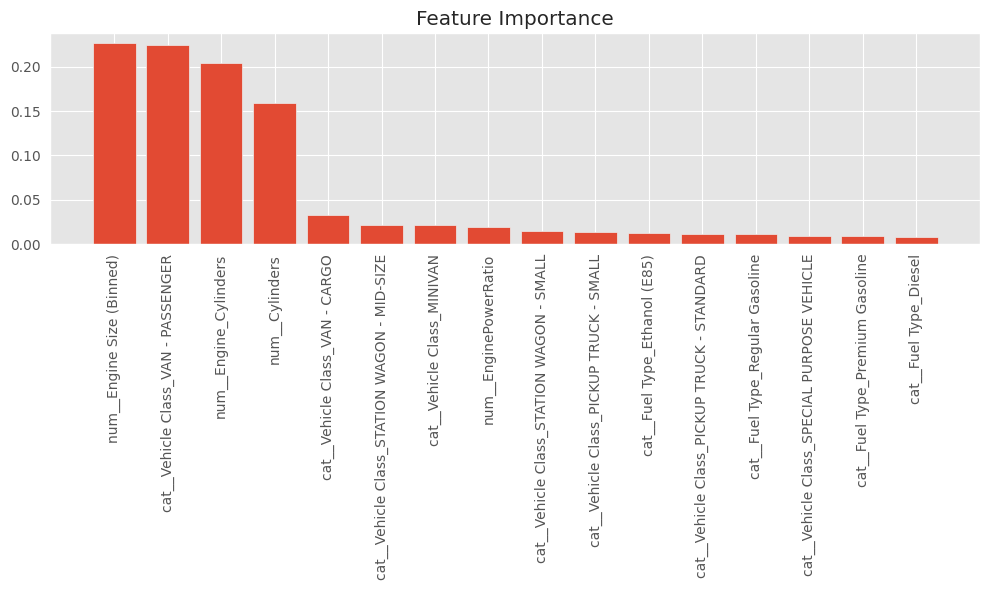

In [67]:
final_model = final_pipeline.named_steps['regressor']
import matplotlib.pyplot as plt
importances = final_model.feature_importances_
feature_names = final_pipeline.named_steps['preprocessor'].get_feature_names_out()

sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [68]:
import joblib

joblib.dump(best_model, "emission_model.pkl")
print("Model saved as emission_model.pkl'")

Model saved as emission_model.pkl'


In [69]:

# Save the trained model and the preprocessor separately
#joblib.dump(final_pipeline.named_steps['regressor'], 'Emission_model.pkl')
joblib.dump(final_pipeline.named_steps['preprocessor'], 'Preprocessor_new.pkl')

#print("Model saved as 'Emission_model.pkl'")
print("Preprocessor saved as 'Preprocessor.pkl'")


Preprocessor saved as 'Preprocessor.pkl'


In [70]:

df.to_csv('processed_co2_emissions.csv', index=False)



In [71]:
# Python version used to run this code

import sys
sys.version

'3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]'

In [72]:
df.head()

,Vehicle Class,Cylinders,Fuel Type,CO2 Emissions(g/km),Engine Size (Binned),Engine_Cylinders,EnginePowerRatio
38,STATION WAGON - SMALL,4,Premium Gasoline,242,2.0,8.0,0.500000
80,STATION WAGON - SMALL,4,Diesel,181,2.0,8.0,0.500000
85,STATION WAGON - SMALL,4,Premium Gasoline,209,2.0,8.0,0.500000
169,STATION WAGON - SMALL,6,Regular Gasoline,253,3.0,18.0,0.500000
170,STATION WAGON - SMALL,6,Regular Gasoline,260,3.5,21.0,0.583333


In [73]:
#JSON FILE

final_model = final_pipeline.named_steps['regressor']
final_model.get_booster().save_model("Emission.json")


In [74]:
%pip install flask

In [75]:
import pickle
with open("Preprocessor_3.pkl", "wb") as f:
    pickle.dump(final_pipeline.named_steps['preprocessor'], f)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 38 to 7378
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle Class         1247 non-null   object 
 1   Cylinders             1247 non-null   int64  
 2   Fuel Type             1247 non-null   object 
 3   CO2 Emissions(g/km)   1247 non-null   int64  
 4   Engine Size (Binned)  1247 non-null   float64
 5   Engine_Cylinders      1247 non-null   float64
 6   EnginePowerRatio      1247 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 77.9+ KB


In [78]:
df['Vehicle Class'].value_counts()

,count
Vehicle Class,
PICKUP TRUCK - STANDARD,538
STATION WAGON - SMALL,252
PICKUP TRUCK - SMALL,159
MINIVAN,80
SPECIAL PURPOSE VEHICLE,77
VAN - PASSENGER,66
STATION WAGON - MID-SIZE,53
VAN - CARGO,22
